In [1]:

import numpy as np
import pandas as pd

# New Section

In [2]:
df=pd.read_excel("/content/customer_churn_large_dataset.xlsx")

In [3]:
#df.describe
print(df.dtypes)


CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object


In [4]:
df['Subscription_Length_Months'] = df['Subscription_Length_Months'].astype(int)
df.describe()
#print(df.dtypes)

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [8]:
dfnew=df[['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Location']]
y=df[['Churn']]
dfnew

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location
0,63,17,73.36,236,Los Angeles
1,62,1,48.76,172,New York
2,24,5,85.47,460,Los Angeles
3,36,3,97.94,297,Miami
4,46,19,58.14,266,Miami
...,...,...,...,...,...
99995,33,23,55.13,226,Houston
99996,62,19,61.65,351,New York
99997,64,17,96.11,251,Chicago
99998,51,20,49.25,434,New York


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#label_encoder1 = LabelEncoder()


In [10]:
dfnew['Location_n'] = label_encoder.fit_transform(dfnew['Location'])
#dfnew['Gender_n'] = label_encoder1.fit_transform(dfnew['Gender'])


<ipython-input-10-14ad37fd26f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Location_n'] = label_encoder.fit_transform(dfnew['Location'])


In [11]:
inputs_n = dfnew.drop(['Location'],axis='columns')

In [12]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the DataFrame using the scaler
df_scaled = pd.DataFrame(scaler.fit_transform(inputs_n), columns=inputs_n.columns)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled,y,test_size=0.2,random_state=5)


In [14]:
X_train.shape

(80000, 5)

In [15]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(7, input_shape=(5,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

#opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6934 - accuracy: 0.5036
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5026
Epoch 3/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5039
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5042
Epoch 5/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5047
Epoch 6/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5066
Epoch 7/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5047
Epoch 8/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5065
Epoch 9/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5061
Epoch 10/100
2500/2500 [==============================] - 5s 2ms/step - l

In [16]:
model.evaluate(X_test, y_test)


625/625 [==============================] - 1s 1ms/step - loss: 0.6941 - accuracy: 0.4960


[0.6941108703613281, 0.49595001339912415]

In [17]:
yp = model.predict(X_test)
yp[:5]


625/625 [==============================] - 1s 1ms/step


array([[0.47585276],
       [0.5383818 ],
       [0.49563193],
       [0.5174238 ],
       [0.48380467]], dtype=float32)

In [18]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0]

In [20]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.49      0.51      0.50      9950
           1       0.50      0.48      0.49     10050

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



Text(95.72222222222221, 0.5, 'Truth')

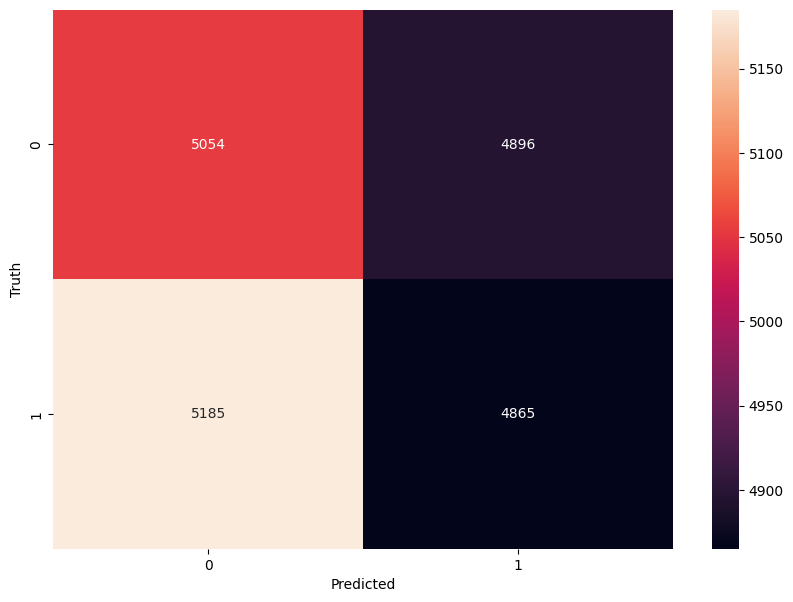

In [21]:
import seaborn as sn
from matplotlib import pyplot as plt

%matplotlib inline
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')